In [6]:
#20220806_웹_실습

In [7]:
%%writefile test.py

from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return "<h1>HELLO</h1>"


if __name__ == "__main__":
    app.run(host='0.0.0.0', port=80, debug =True)

Overwriting test.py


# cell에서 flask 실행

In [8]:
#%%writefile test.py

from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return "<h1>HELLO</h1>"


if __name__ == "__main__":
    app.run(host='0.0.0.0', port=80, debug =False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.101.35:80/ (Press CTRL+C to quit)


# flask 템플릿 연동

In [1]:
%%writefile templates/main.html

<html>
    <h1> {{name}} </h1>

</html>


Overwriting templates/main.html


In [3]:
%%writefile test.py

from flask import Flask,render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template("main.html", name = "이순신")


if __name__ == "__main__":
    app.run(host='0.0.0.0', port=80, debug =True)

Overwriting test.py


# html 분석

In [14]:
from bs4 import BeautifulSoup
import urllib.request as req

code = "005930" #삼성전자 종목코드
url = f"https://finance.naver.com/item/main.naver?code={code}"
print(url)

res =req.urlopen(url).read().decode('cp949')
soup = BeautifulSoup(res,"html.parser")

print(soup.select("p.no_today span.blind")[0].text)
#print(soup.select("p.no_today")[0].text)


https://finance.naver.com/item/main.naver?code=005930
61,500


In [18]:
print(soup.select("div.rate_info >div > p.no_exday > em:nth-child(2) ")[0].text)


보합
0
0



In [49]:
from bs4 import BeautifulSoup
import urllib.request as req

def getstock(code):
    url = f"https://finance.naver.com/item/main.naver?code={code}"

    res =req.urlopen(url).read().decode('cp949')
    soup = BeautifulSoup(res,"html.parser")
  
    stock = soup.select("p.no_today span.blind")[0].text
    status = soup.select(" div.rate_info  div  p.no_exday  em:nth-child(2)")[0].text.split()
    
    ret = (stock,status[0],status[1])
    return ret

print(getstock("051910"))
print(getstock("051910")[1])

('642,000', '상승', '33,000')
상승


In [47]:
#딕셔너리 활용 => 위 코드보다 가독성있다!

In [58]:
from bs4 import BeautifulSoup
import urllib.request as req

def getStock(code):
    url = f"https://finance.naver.com/item/main.naver?code={code}"

    res =req.urlopen(url).read().decode('cp949')
    soup = BeautifulSoup(res,"html.parser")
  
    stock = soup.select("p.no_today span.blind")[0].text
    status = soup.select(" div.rate_info  div  p.no_exday  em:nth-child(2)")[0].text.split()
    
    info = {"stock":stock,"status":status[0],"delta":status[1]}
    return info

print(getStock("051910"))
print(getStock("051910")['status'])


{'stock': '642,000', 'status': '상승', 'delta': '33,000'}
상승


# 웹서비스 연동

-LG화학 642,000  빨간색으로 33,000 제목클릭 시 주가사이트로 이동

-삼성전자 2343242 검은색으로 0

-LG전자 96900 파란색으로 100


In [52]:
datas=[ {'name':"LG화학",'code':"051910"},
      {'name':"삼성전자",'code':"005930"},
      {'name':"LG전자",'code':'066570'}]

In [ ]:
for d in datas:
< a href = https://finance.naver.com/item/main.naver?code={code}> <font color=blue></a>


In [62]:
data = datas[0]
print(data)

info = getStock(data["code"])
print(info)

result = data
result["info"] = info
print(result["info"]["stock"])

{'name': 'LG화학', 'code': '051910', 'info': {'stock': '642,000', 'status': '상승', 'delta': '33,000'}}
{'stock': '642,000', 'status': '상승', 'delta': '33,000'}
642,000


In [63]:
def getStockData(data):
    info = getStock(data["code"])
    
    result = data
    result["info"] = info
    return result

getStockData(datas[0])

{'name': 'LG화학',
 'code': '051910',
 'info': {'stock': '642,000', 'status': '상승', 'delta': '33,000'}}

In [16]:
%%writefile templates/stock.html


관심종목 목록<br/>

{%for data in datas%}
    <a href = "https://finance.naver.com/item/main.naver?code={{data.code}}"> {{data.name}}</a> / {{data.code}} / {{data.info.stock}} // {{data.info.status}} 
    
    {%if data.info.status == "상승" %}
        <font color = red>
    {%elif data.info.status == "하락" %}
        <font color = blue>
    {% else %}
        <font color = black>
    {%endif%}

    / {{data.info.delta}} </font> <br/>

{%endfor%}

Overwriting templates/stock.html


In [19]:
%%writefile stock.py

from flask import Flask,render_template
from bs4 import BeautifulSoup
import urllib.request as req

def getStock(code):
    url = f"https://finance.naver.com/item/main.naver?code={code}"

    res =req.urlopen(url).read().decode('cp949')
    soup = BeautifulSoup(res,"html.parser")
  
    stock = soup.select("p.no_today span.blind")[0].text
    status = soup.select(" div.rate_info  div  p.no_exday  em:nth-child(2)")[0].text.split()
    
    info = {"stock":stock,"status":status[0],"delta":status[1]}
    return info

def getStockData(data):
    info = getStock(data["code"])
    
    result = data
    result["info"] = info
    return result

app = Flask(__name__)

@app.route('/')
def home():
    datas=[ {'name':"LG화학",'code':"051910"},
      {'name':"삼성전자",'code':"005930"},
      {'name':"LG전자",'code':'066570'}]
    
    #result=[]
    #for data in datas:
    #    r = getStockData(data)
    #    result.append(r)
    result = [getStockData(data) for data in datas]
    
    return render_template("stock.html", datas = result)


if __name__ == "__main__":
    app.run(host='127.0.0.1', port=80, debug =True)

Overwriting stock.py


In [24]:
#jupyter notebook에서 HTML을 랜더링

In [23]:
from jinja2 import Template
from IPython.core.display import HTML

from flask import Flask,render_template
from bs4 import BeautifulSoup
import urllib.request as req

def getStock(code):
    url = f"https://finance.naver.com/item/main.naver?code={code}"

    res =req.urlopen(url).read().decode('cp949')
    soup = BeautifulSoup(res,"html.parser")
  
    stock = soup.select("p.no_today span.blind")[0].text
    status = soup.select(" div.rate_info  div  p.no_exday  em:nth-child(2)")[0].text.split()
    
    info = {"stock":stock,"status":status[0],"delta":status[1]}
    return info

def getStockData(data):
    info = getStock(data["code"])
    
    result = data
    result["info"] = info
    return result
datas=[ {'name':"LG화학",'code':"051910"},
      {'name':"삼성전자",'code':"005930"},
      {'name':"LG전자",'code':'066570'}]
result = [getStockData(data) for data in datas ]
    
with open("templates/stock.html", encoding='utf-8') as f: lines = f.read()
template = Template(lines)
html = template.render(datas = result)
HTML(html)

In [28]:
HTML('<h1>hello </h1>')

In [29]:
HTML(Template(lines).render(datas =result))

# 주가예측

In [31]:
!pip install finance-datareader

In [33]:
import FinanceDataReader as fdr

code= "005930"
stock = fdr.DataReader(code) #"1999-01-01","2021-01-01"
stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-05-29,977,1007,969,996,717510,NaN
1998-05-30,986,986,934,936,336920,-0.060241
1998-06-01,930,943,889,910,592491,-0.027778
1998-06-02,889,889,837,838,415922,-0.079121
1998-06-03,856,895,847,884,295514,0.054893
...,...,...,...,...,...,...
2022-08-01,61000,61700,60300,61300,13154816,-0.001629
2022-08-02,61200,61900,61000,61700,13614895,0.006525
2022-08-03,61600,61600,61000,61300,10053861,-0.006483


In [34]:
import matplotlib.pyplot as plt

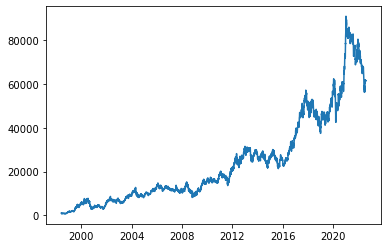

In [35]:
plt.plot(stock["Close"])

In [39]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [41]:
data = np.array([
    [30,78.7,187.3],
    [17,45.3,157.2],
    [70,79,170.5]
])
data

array([[ 30. ,  78.7, 187.3],
       [ 17. ,  45.3, 157.2],
       [ 70. ,  79. , 170.5]])

In [45]:
scaler = MinMaxScaler().fit(data)
scaled = scaler.transform(data)
scaled

array([[0.24528302, 0.99109792, 1.        ],
       [0.        , 0.        , 0.        ],
       [1.        , 1.        , 0.44186047]])

In [46]:
scaler.inverse_transform([[0,0,1.8]])

array([[ 17.  ,  45.3 , 211.38]])

In [50]:
import pandas as pd


#주가 데이터 정규화
scaler = MinMaxScaler().fit(stock)
scaled = scaler.transform(stock)

scale_cols = ["Open","High","Low", "Close","Volume","Change"]
df = pd.DataFrame(scaled,columns = scale_cols)
df

,Open,High,Low,Close,Volume,Change
0,0.010819,0.010403,0.010827,0.003962,0.007945,NaN
1,0.010919,0.010186,0.010436,0.003298,0.003731,0.268895
2,0.010299,0.009742,0.009933,0.003010,0.006561,0.381785
3,0.009845,0.009184,0.009352,0.002213,0.004606,0.203241
4,0.009480,0.009246,0.009464,0.002722,0.003272,0.669268
...,...,...,...,...,...,...
5995,0.675526,0.637397,0.673743,0.671322,0.145669,0.472717
5996,0.677741,0.639463,0.681564,0.675749,0.150764,0.501072
5997,0.682171,0.636364,0.681564,0.671322,0.111331,0.455837
5998,0.683278,0.638430,0.683799,0.673535,0.101050,0.489727


In [71]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)




In [55]:
feature_cols = ["Open","High","Low", "Volume"]
label_cols = ["Close"]


In [73]:
#!pip install tensorflow

In [75]:
import tensorflow as tf

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

In [84]:
train_feature = df[feature_cols]  #  N by 4
train_label = df[label_cols]      # N by 1


train_feature, train_label = make_dataset(train_feature, train_label, 20)

print(train_feature.shape)
print(train_label.shape)

print(train_feature[0, :, :])
print(train_label[0])


model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

history = model.fit(train_feature, train_label,  epochs=2,  batch_size=16)

p = model.predict(train_feature[-1,:,:].reshape(1,20,4))
p = scaler.inverse_transform([[0,0,0, p[0][0], 0, 0]])[0][3]
print(p)

import pickle 
data = {}
data["20220806"] = p
with open(f'{code}.pkl', 'wb') as f:     pickle.dump(data, f)    
data

(5980, 20, 4)
(5980, 1)
[[0.01081949 0.01040289 0.01082682 0.0079453 ]
 [0.01091916 0.01018595 0.01043575 0.00373086]
 [0.010299   0.00974174 0.00993296 0.00656091]
 [0.00984496 0.00918388 0.00935196 0.00460569]
 [0.00947951 0.00924587 0.00946369 0.00327236]
 [0.00978959 0.00955579 0.0098324  0.0052833 ]
 [0.01050941 0.01       0.01004469 0.00432944]
 [0.00988926 0.00922521 0.0093743  0.00430557]
 [0.00968992 0.00909091 0.00883799 0.01091672]
 [0.00883721 0.00835744 0.00858101 0.01216044]
 [0.00834994 0.00797521 0.00821229 0.00725554]
 [0.00797342 0.00795455 0.00804469 0.00422983]
 [0.00807309 0.00784091 0.00789944 0.00318248]
 [0.00782946 0.00766529 0.00758659 0.0053766 ]
 [0.00820598 0.00820248 0.0081676  0.00972994]
 [0.0092691  0.00918388 0.0092514  0.01137025]
 [0.00983389 0.00922521 0.00906145 0.01151271]
 [0.00951274 0.0090186  0.00915084 0.0031814 ]
 [0.00968992 0.00903926 0.0092514  0.00467111]
 [0.00880399 0.00834711 0.00852514 0.00525241]]
[0.00143866]
Epoch 1/2
374/374 [===

{'20220806': 61398.808951854706}

In [82]:
p = model.predict(train_feature[-1,:,:].reshape(1,20,4))
p = scaler.inverse_transform([[0,0,0, p[0][0], 0, 0]])[0][3]
print(p)

1/1 [==============================] - 0s 347ms/step
60788.56495642662


In [83]:
#pkl파일 생성

import pickle 
data = {}
data["20220805"] = 606707
data["20220806"] = 606207
with open(f'{code}.pkl', 'wb') as f:     pickle.dump(data, f)    
data

{'20220805': 606707, '20220806': 606207}

In [86]:
#예측한 날짜의 파일을 읽어들이기

from datetime import datetime
data = {}

try :   
    with open(f'{code}.pkl', 'rb') as f:   data = pickle.load(f)   
except :
    ;
    
today = datetime.today().strftime('%Y%m%d')
data[today] = p
with open(f'{code}.pkl', 'wb') as f:     pickle.dump(data, f)    
data

{'20220806': 61398.808951854706}

In [87]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)


code = '005930'
stock = fdr.DataReader(code)

scaler = MinMaxScaler().fit(stock)
scaled = scaler.transform(stock)
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change']
df = pd.DataFrame(scaled, columns=scale_cols)

feature_cols = ['Open', 'High', 'Low', 'Volume']
label_cols = ['Close']

train_feature = df[feature_cols]  #  N by 4
train_label = df[label_cols]      # N by 1


train_feature, train_label = make_dataset(train_feature, train_label, 20)

print(train_feature.shape)
print(train_label.shape)

print(train_feature[0, :, :])
print(train_label[0])


model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

history = model.fit(train_feature, train_label,  epochs=2,  batch_size=16)

p = model.predict(train_feature[-1,:,:].reshape(1,20,4))
p = scaler.inverse_transform([[0,0,0, p[0][0], 0, 0]])[0][3]
print(p)

data = {}

try :   
    with open(f'{code}.pkl', 'rb') as f:   data = pickle.load(f)   
except :
    ;
    
today = datetime.today().strftime('%Y%m%d')
data[today] = p
with open(f'{code}.pkl', 'wb') as f:     pickle.dump(data, f)    
data

(5980, 20, 4)
(5980, 1)
[[0.01081949 0.01040289 0.01082682 0.0079453 ]
 [0.01091916 0.01018595 0.01043575 0.00373086]
 [0.010299   0.00974174 0.00993296 0.00656091]
 [0.00984496 0.00918388 0.00935196 0.00460569]
 [0.00947951 0.00924587 0.00946369 0.00327236]
 [0.00978959 0.00955579 0.0098324  0.0052833 ]
 [0.01050941 0.01       0.01004469 0.00432944]
 [0.00988926 0.00922521 0.0093743  0.00430557]
 [0.00968992 0.00909091 0.00883799 0.01091672]
 [0.00883721 0.00835744 0.00858101 0.01216044]
 [0.00834994 0.00797521 0.00821229 0.00725554]
 [0.00797342 0.00795455 0.00804469 0.00422983]
 [0.00807309 0.00784091 0.00789944 0.00318248]
 [0.00782946 0.00766529 0.00758659 0.0053766 ]
 [0.00820598 0.00820248 0.0081676  0.00972994]
 [0.0092691  0.00918388 0.0092514  0.01137025]
 [0.00983389 0.00922521 0.00906145 0.01151271]
 [0.00951274 0.0090186  0.00915084 0.0031814 ]
 [0.00968992 0.00903926 0.0092514  0.00467111]
 [0.00880399 0.00834711 0.00852514 0.00525241]]
[0.00143866]
Epoch 1/2
374/374 [===

{'20220806': 60860.225618720055}